In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import dill
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from scipy.stats.stats import pearsonr
import math
import random

In [4]:
# setting flags
debug=False
if debug == True: 
    seed = 10 
else: 
    seed=np.random.randint(100000)

In [5]:
raw_train_data = pd.read_csv('advertising_train.csv',
                       dtype={'companyId':str,'countryId':str,'deviceType':str,'day':str,'dow':str,'price1':np.float64,
                              'price2':np.float64,'price3':np.float64,'ad_area':np.float64,'ad_ratio':np.float64,'requests':np.float64,'impression':np.float64,
                              'cpc':np.float64,'ctr':np.float64,'viewability':np.float64,'ratio1':np.float64,'ratio2':np.float64,'ratio3':np.float64,
                              'ratio4':np.float64,'ratio5':np.float64,'y':np.float64})
                             
raw_test_data = pd.read_csv('advertising_test.csv',
                       dtype={'companyId':str,'countryId':str,'deviceType':str,'day':str,'dow':str,'price1':np.float64,
                              'price2':np.float64,'price3':np.float64,'ad_area':np.float64,'ad_ratio':np.float64,'requests':np.float64,'impression':np.float64,
                              'cpc':np.float64,'ctr':np.float64,'viewability':np.float64,'ratio1':np.float64,'ratio2':np.float64,'ratio3':np.float64,
                              'ratio4':np.float64,'ratio5':np.float64,'y':np.float64})

In [6]:
raw_train_data.sample(10, random_state= seed)

companyId countryId deviceType   day        dow  price1  price2  \
155401        43       202          2  22.0   Saturday    0.00    0.00   
117917        43       166          2  17.0     Monday    0.09    0.16   
44053         43       100          1   7.0     Friday    0.00    0.00   
203431        95        77          1  29.0   Saturday    0.19    0.40   
188357        43        89          2  27.0   Thursday    5.89    5.89   
196369        95        13          2  28.0     Friday    0.05    0.05   
18289         43        43          2   4.0    Tuesday    0.00    0.00   
131377        43        57          2  19.0  Wednesday    0.60    0.88   
136293       159        17          1  20.0   Thursday    0.01    0.13   
19295         43        77          1   4.0    Tuesday    0.00    0.00   

        price3  ad_area  ad_ratio  ...  impression     cpc     ctr  \
155401  0.0000   0.0001   1.00000  ...       264.0  0.0502  0.0114   
117917  0.3190   6.5520   0.12363  ...         0.0  0.0000  0.0000   
44053   0.0000   0.0001   1.00000  ...         0.0  0.0000  0.0000   
203431  0.8000   7.5000   0.83333  ...       783.0  0.2304  0.0013   
188357  5.8897   0.0001   1.00000  ...         0.0  0.0000  0.0000   
196369  0.0500  18.0000   2.00000  ...         0.0  0.0000  0.0000   
18289   0.0000   7.5000   0.83333  ...         0.0  0.0000  0.0000   
131377  1.7548  14.0400   0.64103  ...         0.0  0.0000  0.0000   
136293  0.3760   0.0001   1.00000  ...      7237.0  0.0791  0.0004   
19295   0.0000   0.0001   1.00000  ...         0.0  0.0000  0.0000   

        viewability  ratio1  ratio2  ratio3  ratio4  ratio5         y  
155401       0.4711  1.0000  0.5189  1.0000  0.0000  0.0000  0.733129  
117917       0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.052885  
44053        0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.120588  
203431       0.1759  0.5530  0.9464  0.0664  0.3321  0.6015  0.178365  
188357       0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.103515  
196369       0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.545217  
18289        0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.817647  
131377       0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.294849  
136293       0.0650  0.1206  0.9953  0.0757  0.0645  0.8593  0.023789  
19295        0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.048000  

[10 rows x 21 columns]

In [7]:
def create_boxplot(df,col_name):
    if debug == True: print("starting boxplot")
#    sns.set_style("whitegrid")
    ax = sns.boxplot(x=df[col_name],palette="vlag")

    medians = df[col_name].median()
    median_labels =str(np.round(medians, 2))

    perc_25 = np.percentile(df[col_name],25)
    perc_25_labels = str(np.round(perc_25, 2))

    perc_75 = np.percentile(df[col_name],75)
    perc_75_labels = str(np.round(perc_75, 2))

    ax.text(y=0, x=medians, s=median_labels, 
            horizontalalignment='center', size='small', color='r', weight='semibold')
    ax.text(y=0, x=perc_25, s=perc_25_labels, 
        horizontalalignment='center', size='small', color='r', weight='semibold')
    ax.text(y=0, x=perc_75, s=perc_75_labels, 
        horizontalalignment='center', size='small', color='r', weight='semibold')
    
    ax.set(xlabel="Range of "+col_name, title="BoxPlot of Feature : "+col_name)
    
    plt.grid(True)
    plt.show()
    if debug == True: print("ending boxplot")

In [8]:
def create_histplots(df, col_name,kde = True ):
    if debug == True: print("starting hist plot")
    ax = sns.distplot(df[col_name],kde = True)
    ax.set(ylabel="Frequency of "+col_name, xlabel = "Range of "+col_name, title="BoxPlot of Feature : "+col_name)
    plt.show()
    if debug == True: print("ending hist plot")

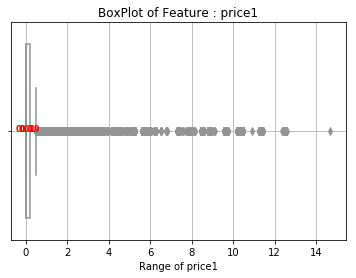

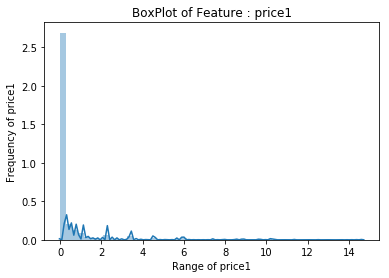

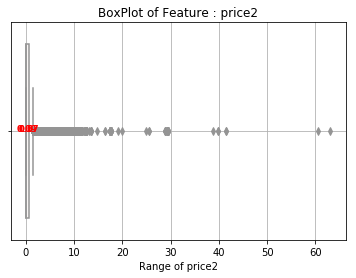

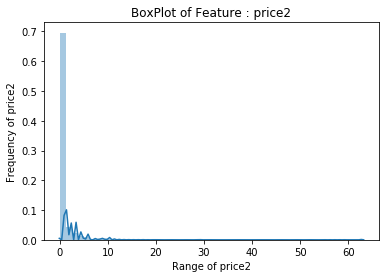

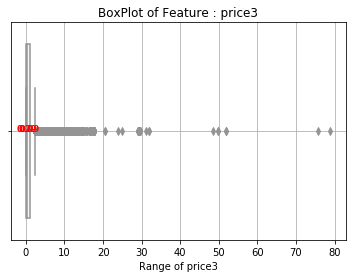

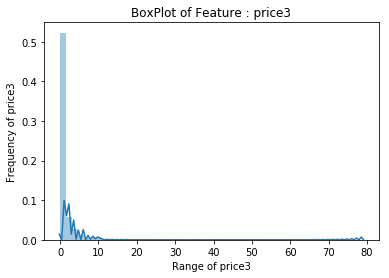

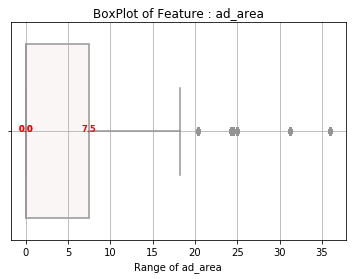

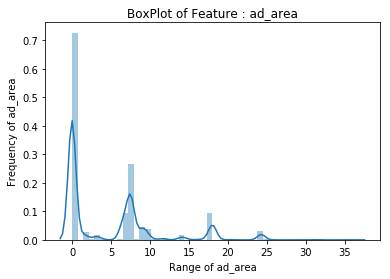

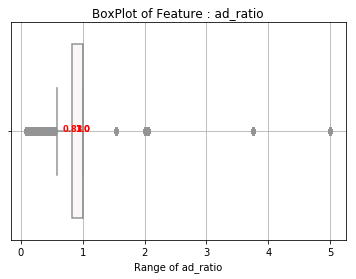

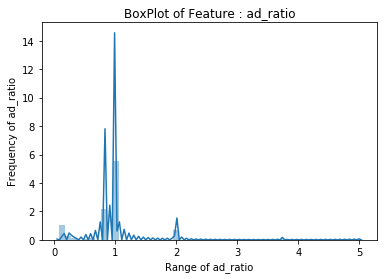

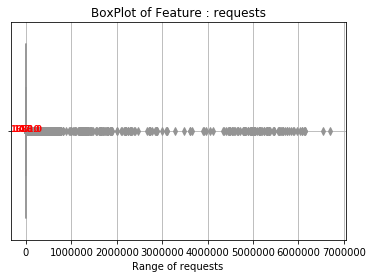

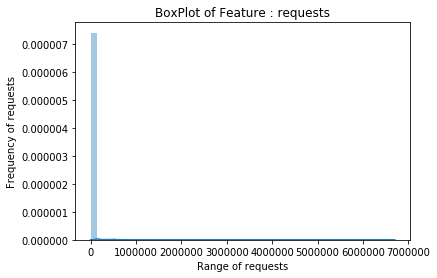

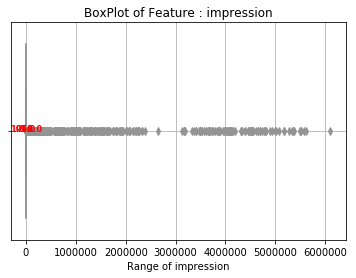

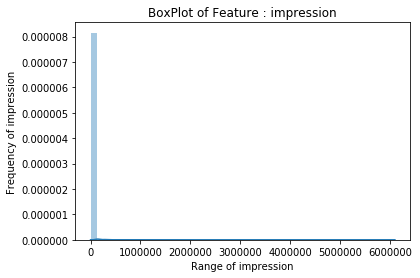

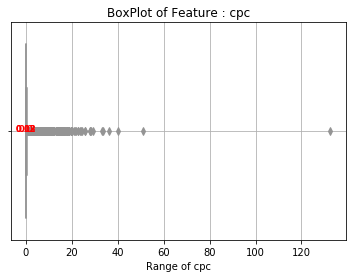

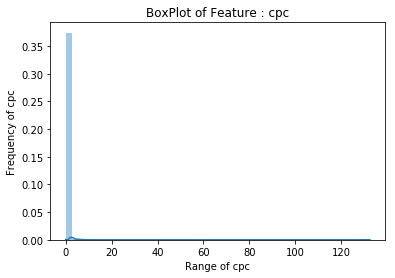

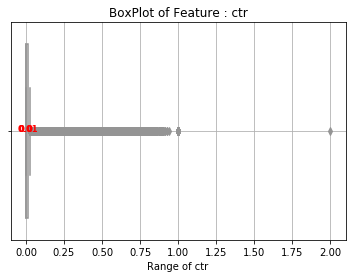

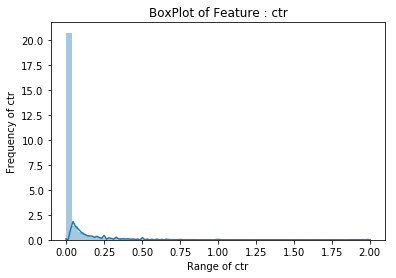

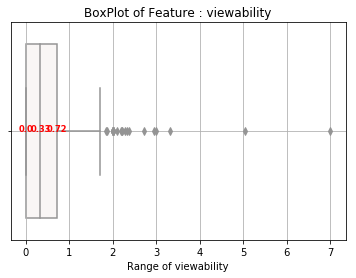

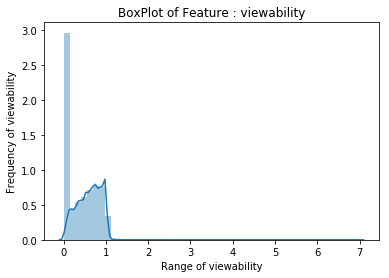

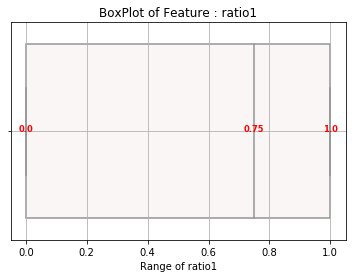

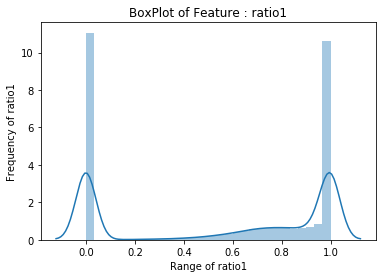

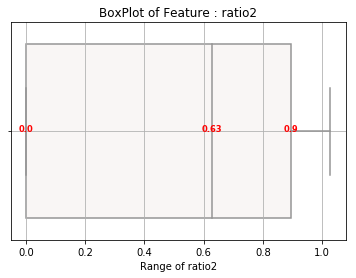

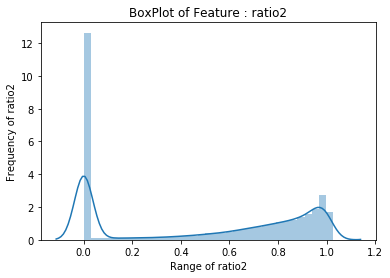

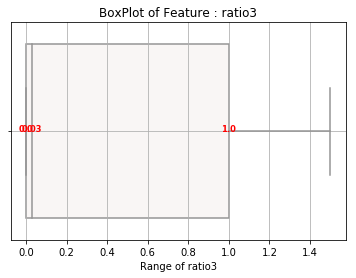

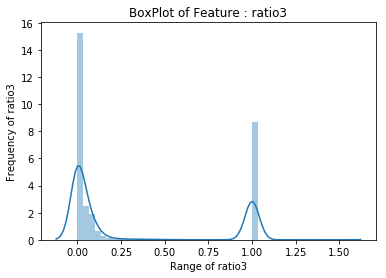

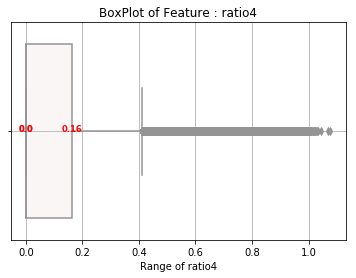

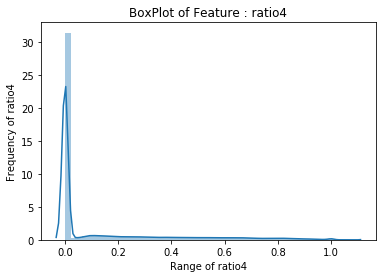

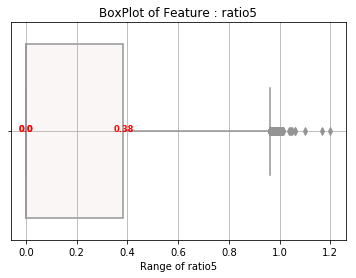

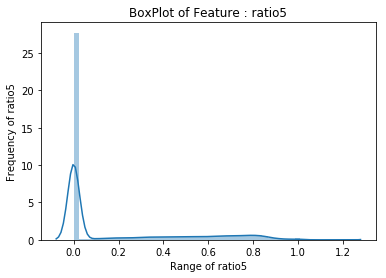

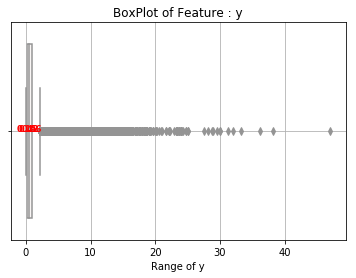

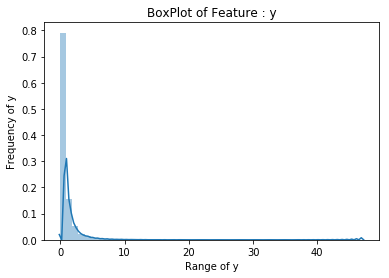

In [9]:
for float_cols in raw_train_data.select_dtypes('float').columns:
    if debug == True: print("we are starting")
    if debug == True: print(float_cols)
    create_boxplot(raw_train_data,float_cols)
    create_histplots(raw_train_data,float_cols)
    if debug == True: print("we are ending")

In [11]:
# Transform the data
trans_train_data = raw_train_data.copy()
for float_cols in trans_train_data.select_dtypes('float').columns:
    trans_train_data[float_cols] = 1/np.sqrt((raw_train_data[float_cols]+0.5)) 

price1


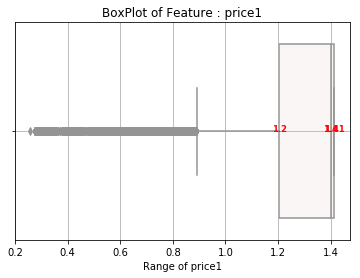

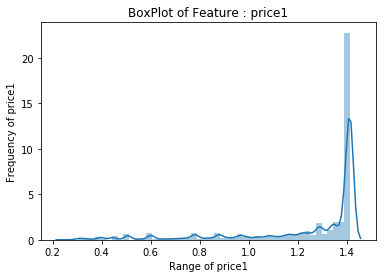

price2


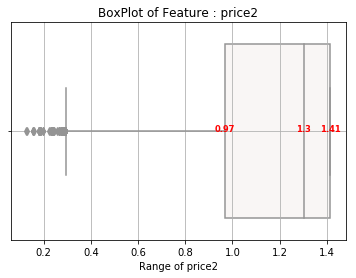

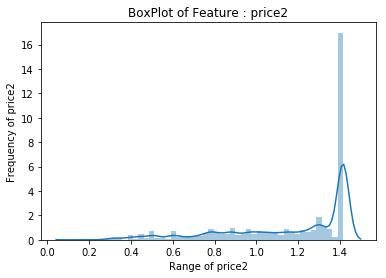

price3


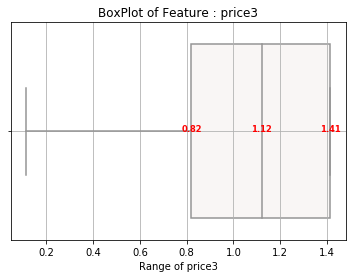

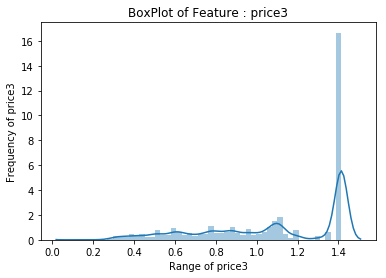

ad_area


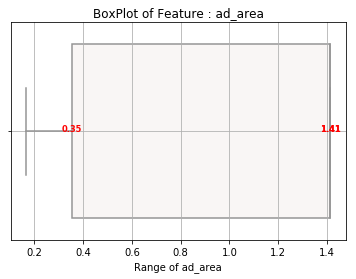

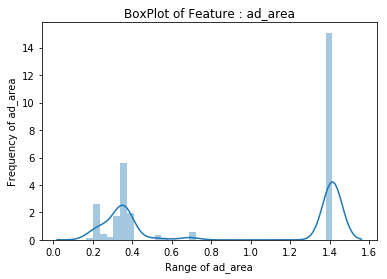

ad_ratio


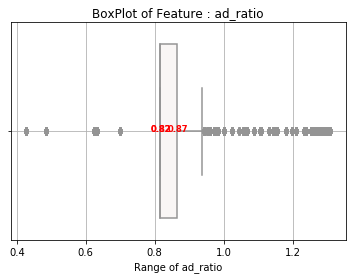

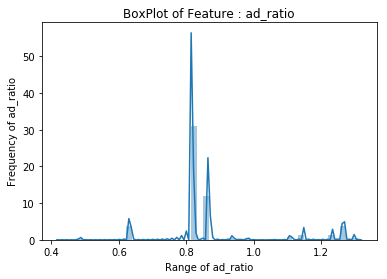

requests


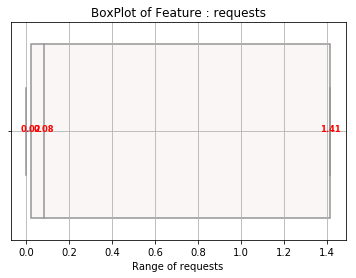

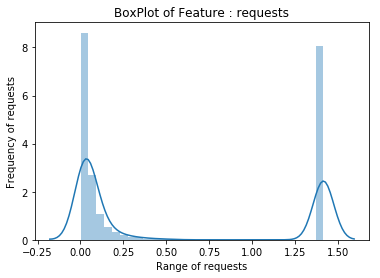

impression


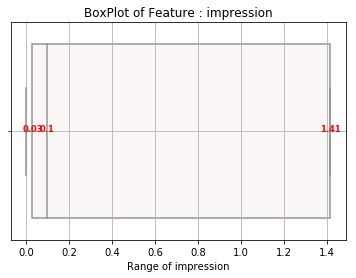

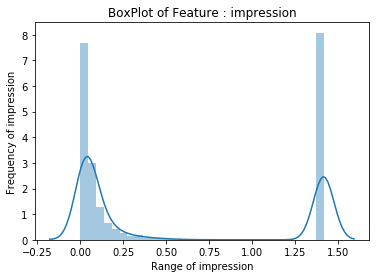

cpc


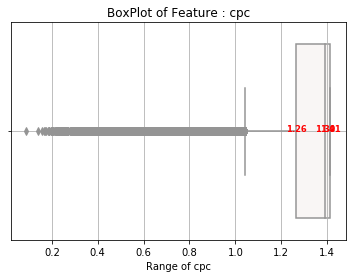

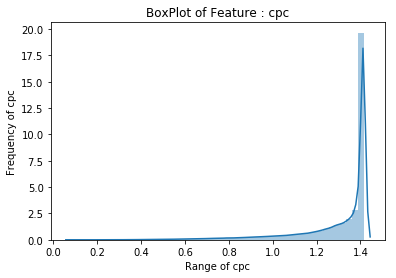

ctr


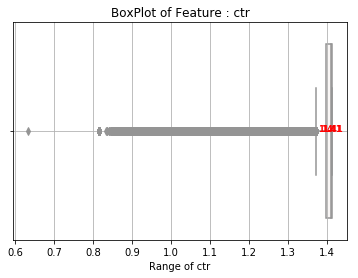

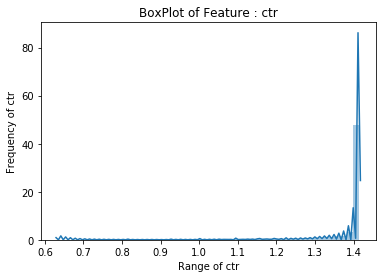

viewability


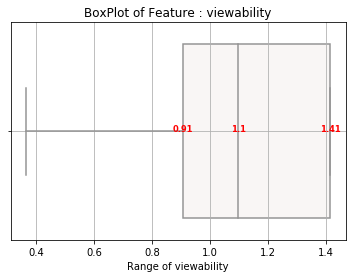

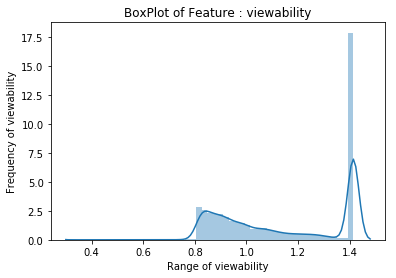

ratio1


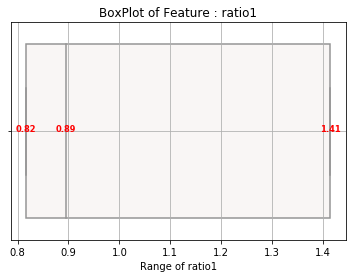

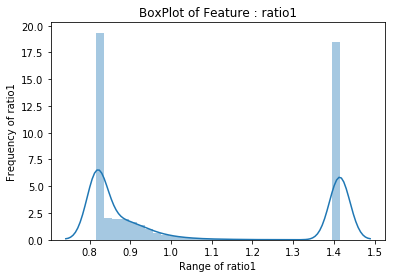

ratio2


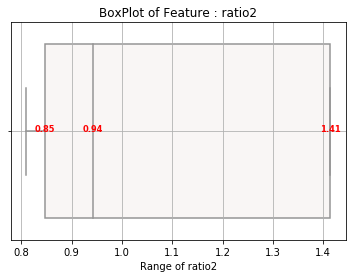

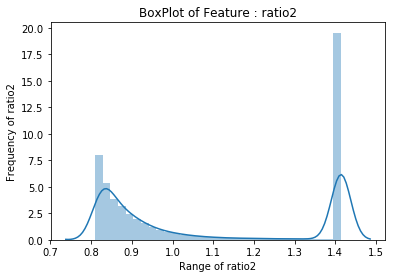

ratio3


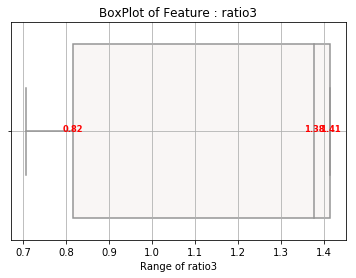

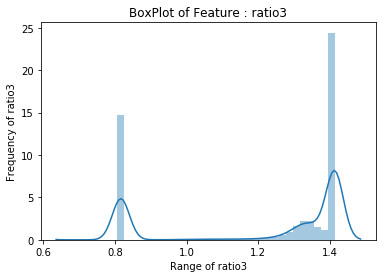

ratio4


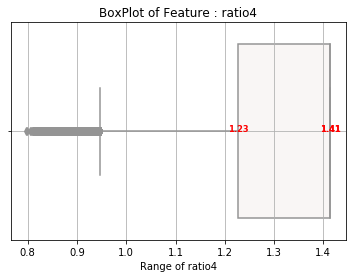

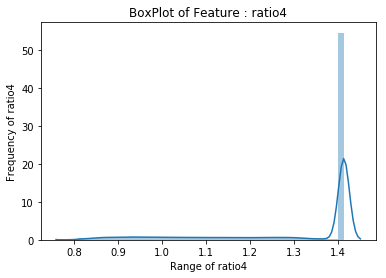

ratio5


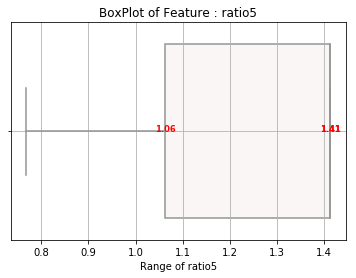

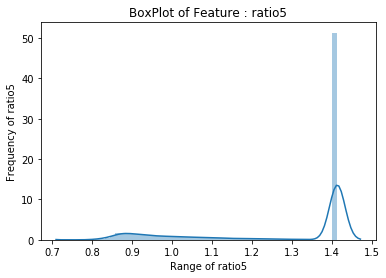

y


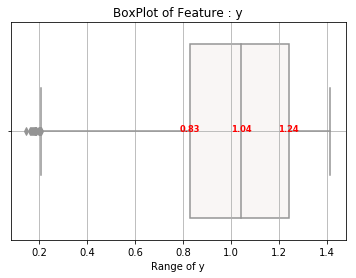

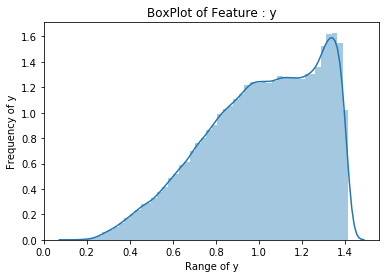

In [12]:
for float_cols in trans_train_data.select_dtypes('float').columns:
    if debug == True: print("we are starting")
    print(float_cols)
    create_boxplot(trans_train_data,float_cols)
    create_histplots(trans_train_data,float_cols)
    if debug == True: print("we are ending")

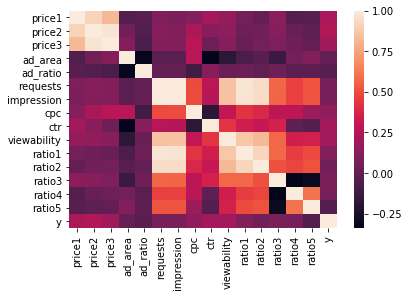

In [13]:
corr = trans_train_data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [14]:
corr

price1    price2    price3   ad_area  ad_ratio  requests  \
price1       1.000000  0.913981  0.824453 -0.056665 -0.031000  0.090016   
price2       0.913981  1.000000  0.969635  0.046692 -0.051326  0.111254   
price3       0.824453  0.969635  1.000000  0.107651 -0.077006  0.109431   
ad_area     -0.056665  0.046692  0.107651  1.000000 -0.322496 -0.024656   
ad_ratio    -0.031000 -0.051326 -0.077006 -0.322496  1.000000  0.010910   
requests     0.090016  0.111254  0.109431 -0.024656  0.010910  1.000000   
impression   0.076821  0.100728  0.101072 -0.018938  0.008999  0.999077   
cpc          0.115478  0.229116  0.272862  0.270166 -0.102505  0.495247   
ctr          0.208300  0.115664  0.037769 -0.332159  0.120202  0.271422   
viewability  0.160339  0.145207  0.110770 -0.182471  0.025317  0.857781   
ratio1       0.055221  0.038751  0.017043 -0.072577  0.031504  0.974875   
ratio2       0.013318  0.045964  0.057714 -0.026837  0.000037  0.944603   
ratio3       0.133510  0.111824  0.086509 -0.130707  0.035244  0.568879   
ratio4      -0.041585  0.017662  0.039573  0.053471 -0.017625  0.466510   
ratio5      -0.033635 -0.012623  0.005708  0.102141 -0.020404  0.519911   
y            0.224428  0.247833  0.193782  0.007731 -0.027359  0.065831   

             impression       cpc       ctr  viewability    ratio1    ratio2  \
price1         0.076821  0.115478  0.208300     0.160339  0.055221  0.013318   
price2         0.100728  0.229116  0.115664     0.145207  0.038751  0.045964   
price3         0.101072  0.272862  0.037769     0.110770  0.017043  0.057714   
ad_area       -0.018938  0.270166 -0.332159    -0.182471 -0.072577 -0.026837   
ad_ratio       0.008999 -0.102505  0.120202     0.025317  0.031504  0.000037   
requests       0.999077  0.495247  0.271422     0.857781  0.974875  0.944603   
impression     1.000000  0.500464  0.253203     0.853718  0.973562  0.943925   
cpc            0.500464  1.000000 -0.182600     0.297498  0.429452  0.390774   
ctr            0.253203 -0.182600  1.000000     0.434815  0.348042  0.304911   
viewability    0.853718  0.297498  0.434815     1.000000  0.870786  0.824738   
ratio1         0.973562  0.429452  0.348042     0.870786  1.000000  0.921824   
ratio2         0.943925  0.390774  0.304911     0.824738  0.921824  1.000000   
ratio3         0.563729  0.280306  0.366006     0.575938  0.571629  0.510563   
ratio4         0.470396  0.281837 -0.014140     0.350187  0.451162  0.480993   
ratio5         0.522933  0.183427 -0.042433     0.359666  0.495393  0.515172   
y              0.068617  0.142865  0.205984     0.199894  0.100416  0.051585   

               ratio3    ratio4    ratio5         y  
price1       0.133510 -0.041585 -0.033635  0.224428  
price2       0.111824  0.017662 -0.012623  0.247833  
price3       0.086509  0.039573  0.005708  0.193782  
ad_area     -0.130707  0.053471  0.102141  0.007731  
ad_ratio     0.035244 -0.017625 -0.020404 -0.027359  
requests     0.568879  0.466510  0.519911  0.065831  
impression   0.563729  0.470396  0.522933  0.068617  
cpc          0.280306  0.281837  0.183427  0.142865  
ctr          0.366006 -0.014140 -0.042433  0.205984  
viewability  0.575938  0.350187  0.359666  0.199894  
ratio1       0.571629  0.451162  0.495393  0.100416  
ratio2       0.510563  0.480993  0.515172  0.051585  
ratio3       1.000000 -0.339641 -0.306377  0.080482  
ratio4      -0.339641  1.000000  0.605448  0.066424  
ratio5      -0.306377  0.605448  1.000000 -0.056907  
y            0.080482  0.066424 -0.056907  1.000000

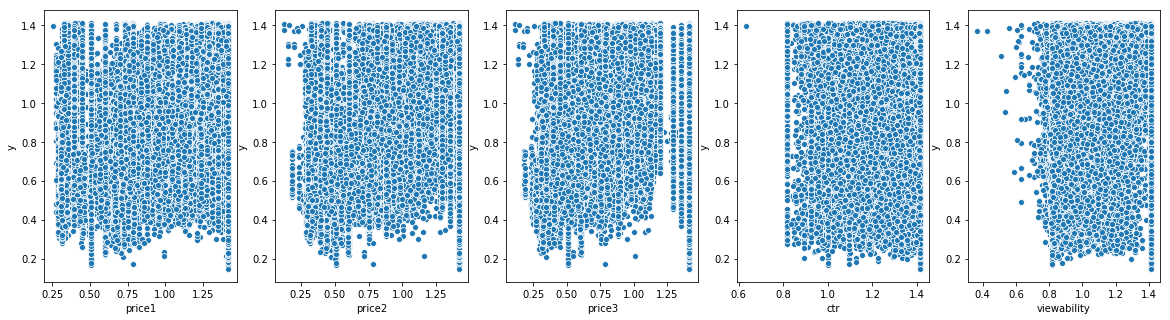

In [13]:
f, axes = plt.subplots(1, 5,figsize=(20,5)) 
sns.scatterplot(x="price1", y="y",data=trans_train_data, ax=axes[0]) 
sns.scatterplot(x="price2", y="y",data=trans_train_data, ax=axes[1]) 
sns.scatterplot(x="price3", y="y",data=trans_train_data, ax=axes[2]) 
sns.scatterplot(x="ctr", y="y",data=trans_train_data, ax=axes[3]) 
sns.scatterplot(x="viewability", y="y",data=trans_train_data, ax=axes[4])


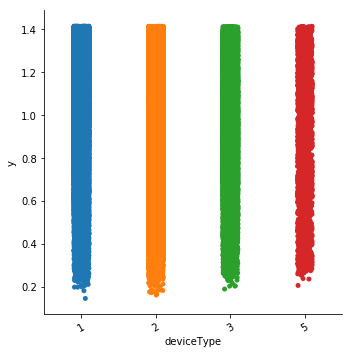

In [14]:
ax = sns.catplot(x="deviceType", y="y",data=trans_train_data); ax.set_xticklabels(rotation=30)

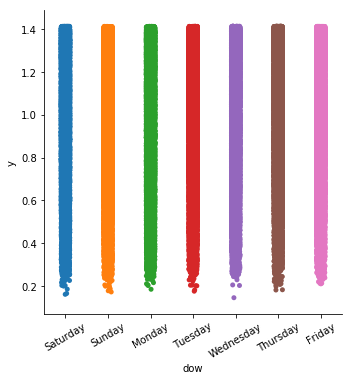

In [15]:
ax = sns.catplot(x="dow", y="y", data=trans_train_data);
ax.set_xticklabels(rotation=30)

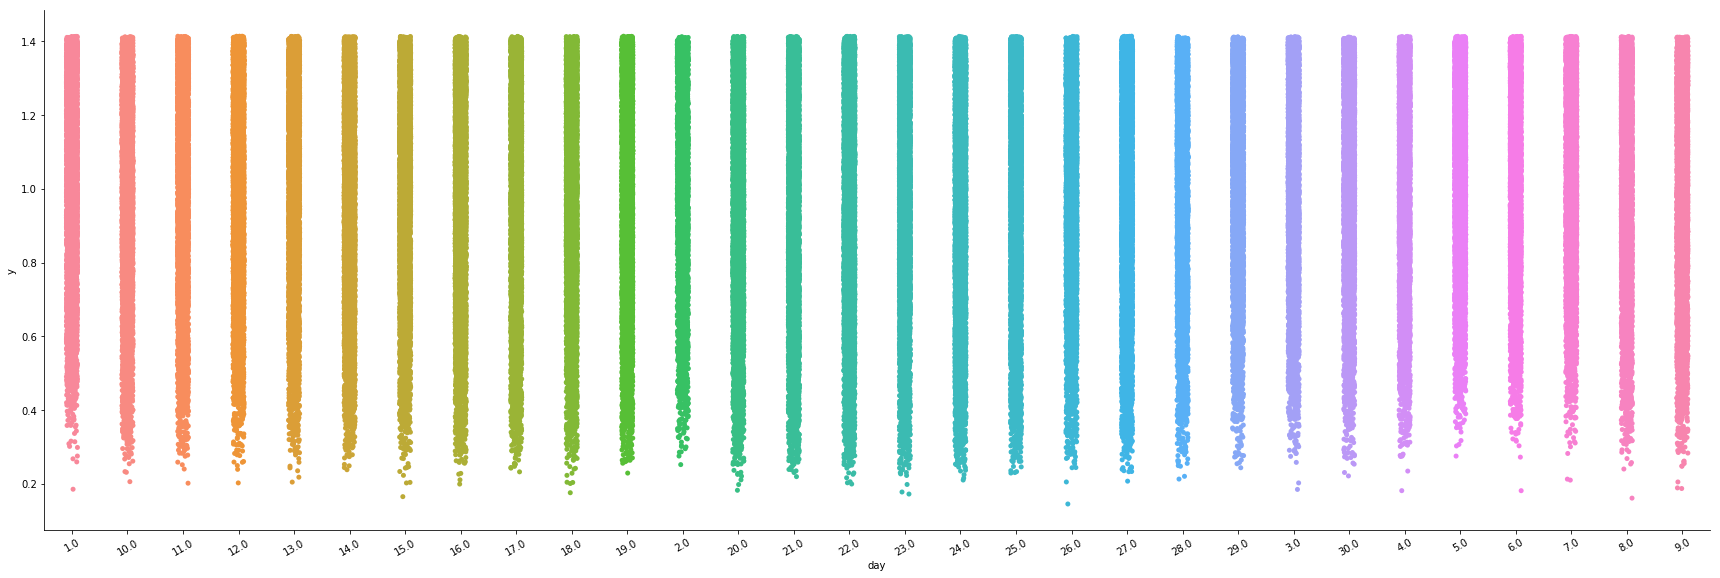

In [16]:
ax = sns.catplot(x="day", y="y", data=trans_train_data, height=8, aspect = 3);
ax.set_xticklabels(rotation=30)

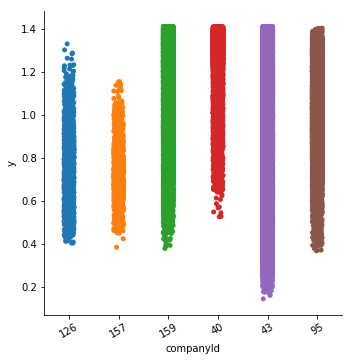

In [17]:
ax = sns.catplot(x="companyId", y="y", data=trans_train_data);
ax.set_xticklabels(rotation=30)

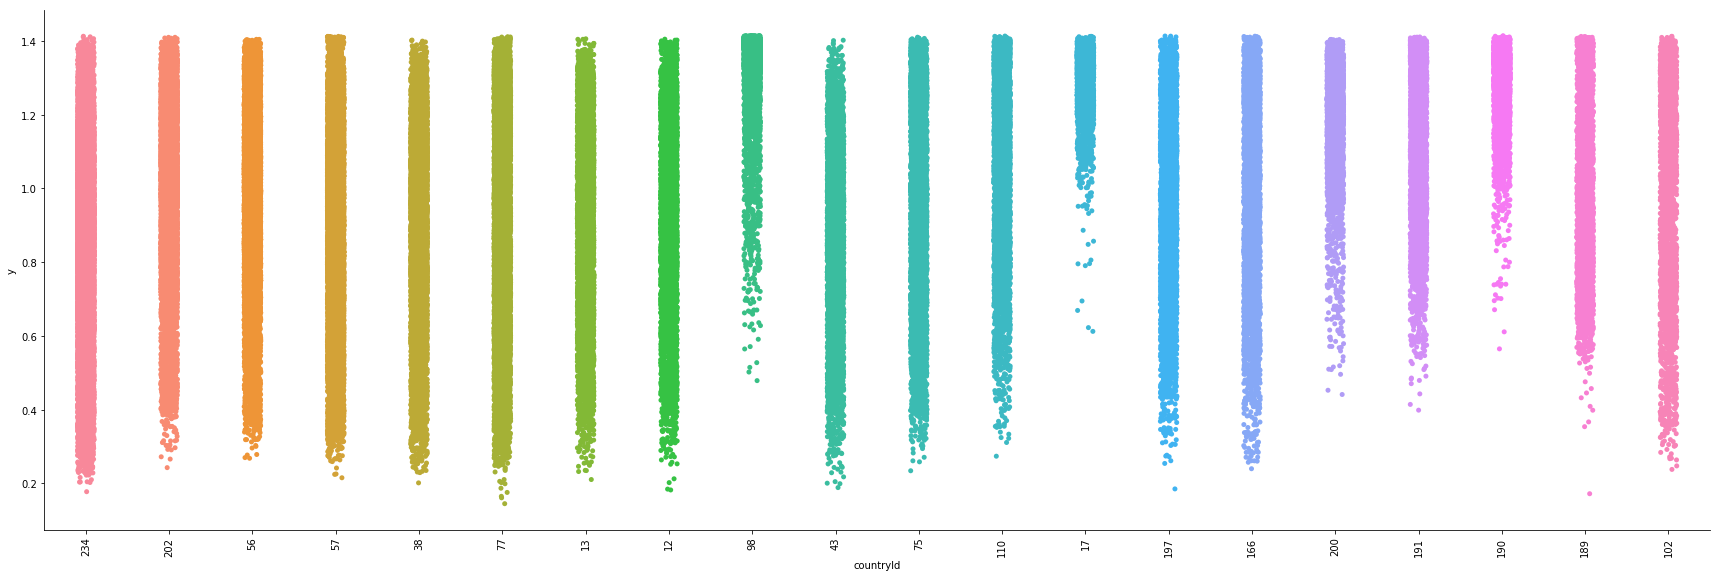

In [18]:
top_countryId = trans_train_data['countryId'].value_counts().nlargest(20).keys()
if debug == True: print(top_countryId)
top_country_data = trans_train_data[trans_train_data.countryId.isin(top_countryId)]
ax = sns.catplot(x="countryId", y="y", data=top_country_data, height=8, aspect = 3, order = top_countryId )
ax.set_xticklabels(rotation=90)

In [34]:
def create_plot(df,col_name, iaxes, box=True):
    if debug == True: print("starting plots")
        
    if box == True: 
        ax = sns.boxplot(x=df[col_name],palette="vlag", ax=axes[iaxes])

        medians = df[col_name].median()
        median_labels =str(np.round(medians, 2))

        perc_25 = np.percentile(df[col_name],25)
        perc_25_labels = str(np.round(perc_25, 2))

        perc_75 = np.percentile(df[col_name],75)
        perc_75_labels = str(np.round(perc_75, 2))

        ax.text(y=0, x=medians, s=median_labels,
            horizontalalignment='center', size='small', color='r', weight='semibold')
        ax.text(y=0, x=perc_25, s=perc_25_labels, 
            horizontalalignment='center', size='small', color='r', weight='semibold')
        ax.text(y=0, x=perc_75, s=perc_75_labels, 
            horizontalalignment='center', size='small', color='r', weight='semibold')

        ax.set(xlabel="Range of "+col_name, title="BoxPlot of Feature : "+col_name)

        plt.grid(True)
        plt.show()
    else:
        ax = sns.distplot(df[col_name],kde = True)
        ax.set(ylabel="Frequency of "+col_name, xlabel = col_name, title="Histogram of Feature : "+col_name)
        plt.show()

    if debug == True: print("ending plot")

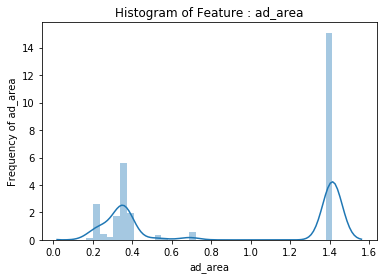

In [31]:
create_plot(trans_train_data,'ad_area',0, box=False)
#sns.scatterplot(x="price1", y="y",data=trans_train_data, ax=axes[0]) 

In [99]:
def multiplots(df, col1, col2, col3, col1_hist, col2_hist, col3_hist):
    f, axes = plt.subplots(1, 3,figsize=(10,4)) 

    if col1_hist == True:
        ax = sns.boxplot(x=df[col1],palette="vlag", ax=axes[0])
    else :
        ax = sns.distplot(df[col1],kde = True, ax=axes[0])

    medians = df[col1].median()
    median_labels =str(np.round(medians, 2))

    perc_25 = np.percentile(df[col1],25)
    perc_25_labels = str(np.round(perc_25, 2))

    perc_75 = np.percentile(df[col1],75)
    perc_75_labels = str(np.round(perc_75, 2))

    ax.text(y=0, x=medians, s=median_labels,
        horizontalalignment='center', size='small', color='b', weight='semibold')
    ax.text(y=0, x=perc_25, s=perc_25_labels, 
        horizontalalignment='center', size='small', color='b', weight='semibold')
    ax.text(y=0, x=perc_75, s=perc_75_labels, 
        horizontalalignment='center', size='small', color='b', weight='semibold')
    ax.set(ylabel=col1, xlabel = "Range of "+col1, title="BoxPlot of Feature : "+col1)
    #plt.show()

    if col2_hist == True :
        ax2 = sns.boxplot(x=df[col2],palette="vlag", ax=axes[1])
    else :
        ax2 = sns.distplot(df[col2],kde = True, ax=axes[1])
        
    medians2 =df[col2].median()
    median_labels2 =str(np.round(medians2, 2))

    perc_252 = np.percentile(df[col2],25)
    perc_25_labels2 = str(np.round(perc_252, 2))

    perc_752 = np.percentile(df[col2],75)
    perc_75_labels2= str(np.round(perc_752, 2))

    ax2.text(y=0, x=medians2, s=median_labels2,
        horizontalalignment='center', size='small', color='b', weight='semibold')
    ax2.text(y=0, x=perc_252, s=perc_25_labels2, 
        horizontalalignment='center', size='small', color='b', weight='semibold')
    ax2.text(y=0, x=perc_752, s=perc_75_labels2, 
        horizontalalignment='center', size='small', color='b', weight='semibold')
    ax2.set(ylabel=col2, xlabel = "Range of "+col2, title="BoxPlot of Feature : "+col2)
    #plt.show()

    if col3_hist == True :
        ax3 = sns.boxplot(x=df[col3],palette="vlag", ax=axes[2])
    else :
        ax3 = sns.distplot(df[col3],kde = True, ax=axes[2])

    medians3 = df[col3].median()
    median_labels3 =str(np.round(medians3, 2))

    perc_253 = np.percentile(df[col3],25)
    perc_25_labels3 = str(np.round(perc_253, 2))

    perc_753 = np.percentile(df[col3],75)
    perc_75_labels3 = str(np.round(perc_753, 2))

    ax3.text(y=0, x=medians3, s=median_labels3,
        horizontalalignment='center', size='small', color='b', weight='semibold')
    ax3.text(y=0, x=perc_253, s=perc_25_labels3, 
        horizontalalignment='center', size='small', color='b', weight='semibold')
    ax3.text(y=0, x=perc_753, s=perc_75_labels3, 
        horizontalalignment='center', size='small', color='b', weight='semibold')
    ax3.set(ylabel=col3, xlabel = "Range of "+col3, title="BoxPlot of Feature : "+col3)
    plt.show()
    

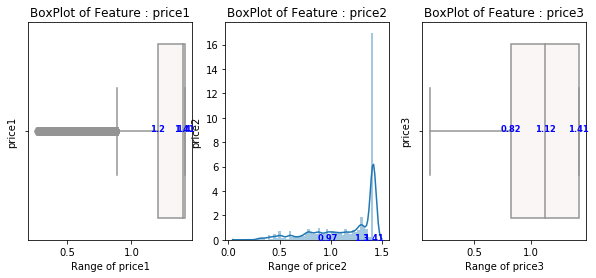

In [100]:
multiplots(trans_train_data,'price1','price2','price3', True, False, True)

In [136]:
def bar_plot(df,col_name):
    ax = sns.countplot(df[col_name], 
             order = df[col_name].value_counts().index)

    for p, label in zip(ax.patches, df[col_name].value_counts()):
        ax.annotate(label, (p.get_x(), p.get_height()+10))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    ax.set(title="abc")
    plt.show()

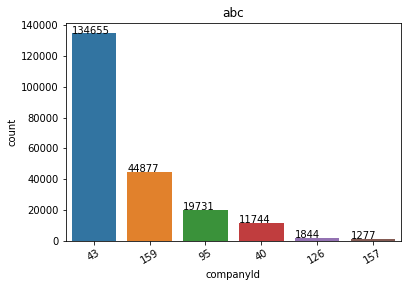

In [137]:
bar_plot(trans_train_data,'companyId')

In [135]:
round(trans_train_data.describe(),3)

price1      price2      price3     ad_area    ad_ratio    requests  \
count  214128.000  214128.000  214128.000  214128.000  214128.000  214128.000   
mean        1.247       1.166       1.092       0.904       0.875       0.559   
std         0.272       0.306       0.345       0.539       0.160       0.656   
min         0.257       0.125       0.112       0.166       0.426       0.000   
25%         1.204       0.967       0.820       0.354       0.816       0.025   
50%         1.400       1.302       1.122       1.414       0.816       0.082   
75%         1.414       1.414       1.414       1.414       0.866       1.414   
max         1.414       1.414       1.414       1.414       1.309       1.414   

       impression         cpc         ctr  viewability      ratio1  \
count  214128.000  214128.000  214128.000   214128.000  214128.000   
mean        0.567       1.301       1.380        1.141       1.062   
std         0.651       0.185       0.081        0.239       0.274   
min         0.000       0.087       0.632        0.365       0.816   
25%         0.031       1.265       1.398        0.907       0.816   
50%         0.100       1.393       1.412        1.097       0.894   
75%         1.414       1.414       1.414        1.414       1.414   
max         1.414       1.414       1.414        1.414       1.414   

           ratio2      ratio3      ratio4      ratio5           y  
count  214128.000  214128.000  214128.000  214128.000  214128.000  
mean        1.088       1.216       1.307       1.272       1.014  
std         0.262       0.262       0.177       0.212       0.265  
min         0.809       0.707       0.796       0.767       0.145  
25%         0.846       0.816       1.228       1.063       0.828  
50%         0.942       1.377       1.414       1.414       1.043  
75%         1.414       1.414       1.414       1.414       1.240  
max         1.414       1.414       1.414       1.414       1.414

* **`abc:`**

1. add bar plots for all categorical feat - company, country, dow, day of month, devicetype
5. report writing


2. add scatter plats for y and 5 highest correlated feat
3. some graph for all interaction between categorical and target
4. what to do with day of month 

top_countryId

top_countryId